In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
path = os.getcwd() + '/ex2data2.txt'
df = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
df.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
Test 1      118 non-null float64
Test 2      118 non-null float64
Accepted    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [3]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values

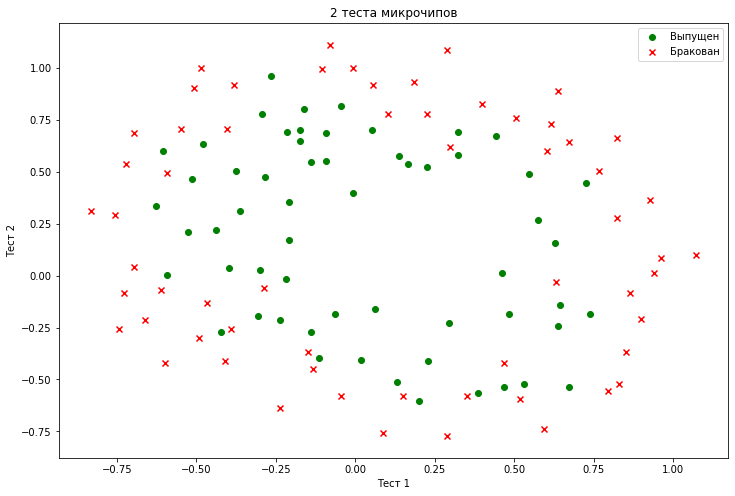

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red',marker='x', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [5]:
# Как видно из графика, результаты теста не могут быть линейно разделены.
# Поэтому создаем дополнительную полиномиальную функцию более высокого порядка.
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            print("[ X1^",i-j,"* X2^",j,"]") # контроль степеней
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j))) # первая колонка будет всегда единичка
            
    return res

In [6]:
# Определим полиномиальные признаки до степени 2 
degree = 2

In [7]:
X_poly = mapFeature(df.iloc[:, 0], df.iloc[:, 1], degree)

[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]


In [8]:
# Функция для отображения на графике границы принятия решения
def plotDecisionBoundary(theta,degree, ax):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = ax.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    ax.legend(labels=['Выпущен', 'Бракован'])
 
    return cs

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

In [11]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
initial_theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
# Now call the optimization routine
#NOTE: This automatically picks the learning rate
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))

In [13]:
# our optimizated coefficients
theta = res.x
theta

array([  5.16953139,   3.24770402,   4.16640745, -12.02748062,
        -7.53190073, -11.82290061])

[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]


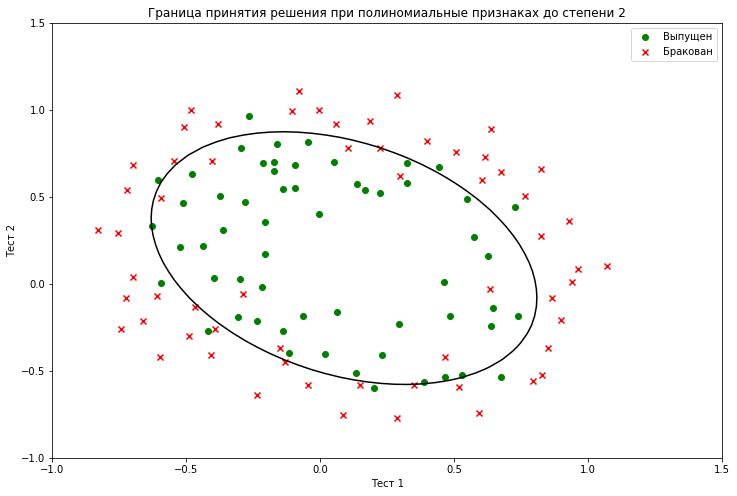

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red',marker='x', label='Бракован')

plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('Граница принятия решения при полиномиальные признаках до степени 2')

plotDecisionBoundary(theta, degree, ax)
#plt.legend();

In [15]:
# Определим полиномиальные признаки до степени 1
degree = 1
# map features to the degree
X_poly = mapFeature(df.iloc[:, 0], df.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]


[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]


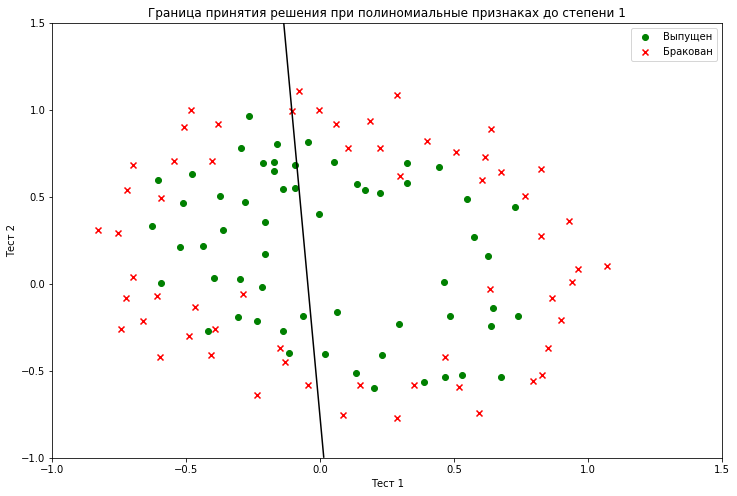

In [16]:
# Run the optimzation function
res = minimize(costFunc, initial_theta, args=(X_poly, y))
theta = res.x.reshape(res.x.shape[0], 1)

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red',marker='x', label='Бракован')

plotDecisionBoundary(theta, degree, ax)

plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('Граница принятия решения при полиномиальные признаках до степени 1')
plt.legend();

In [17]:
# Определим полиномиальные признаки до степени 6
degree = 6
# map features to the degree
X_poly = mapFeature(df.iloc[:, 0], df.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]
[ X1^ 3 * X2^ 0 ]
[ X1^ 2 * X2^ 1 ]
[ X1^ 1 * X2^ 2 ]
[ X1^ 0 * X2^ 3 ]
[ X1^ 4 * X2^ 0 ]
[ X1^ 3 * X2^ 1 ]
[ X1^ 2 * X2^ 2 ]
[ X1^ 1 * X2^ 3 ]
[ X1^ 0 * X2^ 4 ]
[ X1^ 5 * X2^ 0 ]
[ X1^ 4 * X2^ 1 ]
[ X1^ 3 * X2^ 2 ]
[ X1^ 2 * X2^ 3 ]
[ X1^ 1 * X2^ 4 ]
[ X1^ 0 * X2^ 5 ]
[ X1^ 6 * X2^ 0 ]
[ X1^ 5 * X2^ 1 ]
[ X1^ 4 * X2^ 2 ]
[ X1^ 3 * X2^ 3 ]
[ X1^ 2 * X2^ 4 ]
[ X1^ 1 * X2^ 5 ]
[ X1^ 0 * X2^ 6 ]


[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]
[ X1^ 3 * X2^ 0 ]
[ X1^ 2 * X2^ 1 ]
[ X1^ 1 * X2^ 2 ]
[ X1^ 0 * X2^ 3 ]
[ X1^ 4 * X2^ 0 ]
[ X1^ 3 * X2^ 1 ]
[ X1^ 2 * X2^ 2 ]
[ X1^ 1 * X2^ 3 ]
[ X1^ 0 * X2^ 4 ]
[ X1^ 5 * X2^ 0 ]
[ X1^ 4 * X2^ 1 ]
[ X1^ 3 * X2^ 2 ]
[ X1^ 2 * X2^ 3 ]
[ X1^ 1 * X2^ 4 ]
[ X1^ 0 * X2^ 5 ]
[ X1^ 6 * X2^ 0 ]
[ X1^ 5 * X2^ 1 ]
[ X1^ 4 * X2^ 2 ]
[ X1^ 3 * X2^ 3 ]
[ X1^ 2 * X2^ 4 ]
[ X1^ 1 * X2^ 5 ]
[ X1^ 0 * X2^ 6 ]


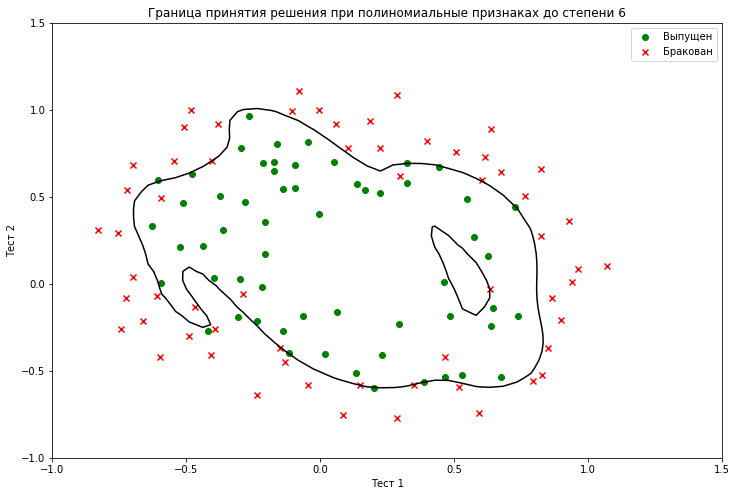

In [18]:
# Run the optimzation function
res = minimize(costFunc, initial_theta, args=(X_poly, y))
theta = res.x.reshape(res.x.shape[0], 1)

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red',marker='x', label='Бракован')

plotDecisionBoundary(theta, degree, ax)

plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('Граница принятия решения при полиномиальные признаках до степени 6')
plt.legend();

# Добавим регуляризацию
$J(\theta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\theta (z_i) – (1 – y_i) log(1-h_\theta (z_i))] + 
                    \frac{\lambda}{2m} \sum_{j=1}^n[\theta_j^2]$

In [19]:
# Функция потерь с учетом регуляризации
def costFuncReg(theta, X, y, reg_factor):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    
    # Regularization Term
    reg_term = (reg_factor * sum(theta[1:] ** 2)) / (2 * m)
    J = J + reg_term
    return J  

In [20]:
# Пусть the regularization factor равен 1
reg_factor = 1
# полиномиальные признаки до степени 6
degree = 6
# map features to the degree
X_poly = mapFeature(df.iloc[:, 0], df.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]
[ X1^ 3 * X2^ 0 ]
[ X1^ 2 * X2^ 1 ]
[ X1^ 1 * X2^ 2 ]
[ X1^ 0 * X2^ 3 ]
[ X1^ 4 * X2^ 0 ]
[ X1^ 3 * X2^ 1 ]
[ X1^ 2 * X2^ 2 ]
[ X1^ 1 * X2^ 3 ]
[ X1^ 0 * X2^ 4 ]
[ X1^ 5 * X2^ 0 ]
[ X1^ 4 * X2^ 1 ]
[ X1^ 3 * X2^ 2 ]
[ X1^ 2 * X2^ 3 ]
[ X1^ 1 * X2^ 4 ]
[ X1^ 0 * X2^ 5 ]
[ X1^ 6 * X2^ 0 ]
[ X1^ 5 * X2^ 1 ]
[ X1^ 4 * X2^ 2 ]
[ X1^ 3 * X2^ 3 ]
[ X1^ 2 * X2^ 4 ]
[ X1^ 1 * X2^ 5 ]
[ X1^ 0 * X2^ 6 ]


[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]
[ X1^ 3 * X2^ 0 ]
[ X1^ 2 * X2^ 1 ]
[ X1^ 1 * X2^ 2 ]
[ X1^ 0 * X2^ 3 ]
[ X1^ 4 * X2^ 0 ]
[ X1^ 3 * X2^ 1 ]
[ X1^ 2 * X2^ 2 ]
[ X1^ 1 * X2^ 3 ]
[ X1^ 0 * X2^ 4 ]
[ X1^ 5 * X2^ 0 ]
[ X1^ 4 * X2^ 1 ]
[ X1^ 3 * X2^ 2 ]
[ X1^ 2 * X2^ 3 ]
[ X1^ 1 * X2^ 4 ]
[ X1^ 0 * X2^ 5 ]
[ X1^ 6 * X2^ 0 ]
[ X1^ 5 * X2^ 1 ]
[ X1^ 4 * X2^ 2 ]
[ X1^ 3 * X2^ 3 ]
[ X1^ 2 * X2^ 4 ]
[ X1^ 1 * X2^ 5 ]
[ X1^ 0 * X2^ 6 ]


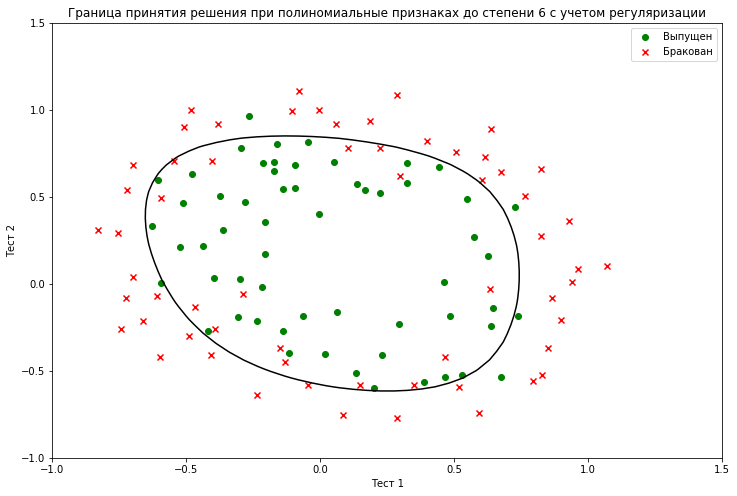

In [21]:
# Run the optimzation function with regularization factor passed to the cost function
res = minimize(costFuncReg, initial_theta, args=(X_poly, y, reg_factor))
theta = res.x.reshape(res.x.shape[0], 1)

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red',marker='x', label='Бракован')

plotDecisionBoundary(theta, degree, ax)

plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('Граница принятия решения при полиномиальные признаках до степени 6 с учетом регуляризации')
plt.legend();

In [22]:
# А вот что будет, если regularization factor равен 100
reg_factor = 100
# полиномиальные признаки до степени 6
degree = 6
# map features to the degree
X_poly = mapFeature(df.iloc[:, 0], df.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]
[ X1^ 3 * X2^ 0 ]
[ X1^ 2 * X2^ 1 ]
[ X1^ 1 * X2^ 2 ]
[ X1^ 0 * X2^ 3 ]
[ X1^ 4 * X2^ 0 ]
[ X1^ 3 * X2^ 1 ]
[ X1^ 2 * X2^ 2 ]
[ X1^ 1 * X2^ 3 ]
[ X1^ 0 * X2^ 4 ]
[ X1^ 5 * X2^ 0 ]
[ X1^ 4 * X2^ 1 ]
[ X1^ 3 * X2^ 2 ]
[ X1^ 2 * X2^ 3 ]
[ X1^ 1 * X2^ 4 ]
[ X1^ 0 * X2^ 5 ]
[ X1^ 6 * X2^ 0 ]
[ X1^ 5 * X2^ 1 ]
[ X1^ 4 * X2^ 2 ]
[ X1^ 3 * X2^ 3 ]
[ X1^ 2 * X2^ 4 ]
[ X1^ 1 * X2^ 5 ]
[ X1^ 0 * X2^ 6 ]


[ X1^ 1 * X2^ 0 ]
[ X1^ 0 * X2^ 1 ]
[ X1^ 2 * X2^ 0 ]
[ X1^ 1 * X2^ 1 ]
[ X1^ 0 * X2^ 2 ]
[ X1^ 3 * X2^ 0 ]
[ X1^ 2 * X2^ 1 ]
[ X1^ 1 * X2^ 2 ]
[ X1^ 0 * X2^ 3 ]
[ X1^ 4 * X2^ 0 ]
[ X1^ 3 * X2^ 1 ]
[ X1^ 2 * X2^ 2 ]
[ X1^ 1 * X2^ 3 ]
[ X1^ 0 * X2^ 4 ]
[ X1^ 5 * X2^ 0 ]
[ X1^ 4 * X2^ 1 ]
[ X1^ 3 * X2^ 2 ]
[ X1^ 2 * X2^ 3 ]
[ X1^ 1 * X2^ 4 ]
[ X1^ 0 * X2^ 5 ]
[ X1^ 6 * X2^ 0 ]
[ X1^ 5 * X2^ 1 ]
[ X1^ 4 * X2^ 2 ]
[ X1^ 3 * X2^ 3 ]
[ X1^ 2 * X2^ 4 ]
[ X1^ 1 * X2^ 5 ]
[ X1^ 0 * X2^ 6 ]


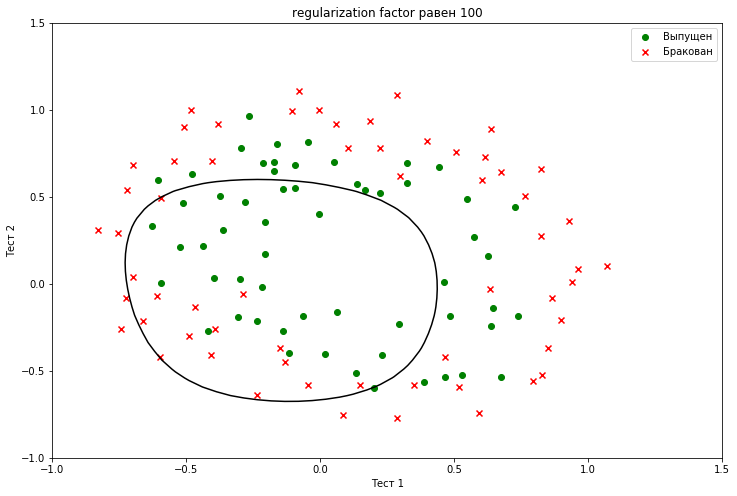

In [23]:
# Run the optimzation function with regularization factor passed to the cost function
res = minimize(costFuncReg, initial_theta, args=(X_poly, y, reg_factor))
theta = res.x.reshape(res.x.shape[0], 1)

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red',marker='x', label='Бракован')

plotDecisionBoundary(theta, degree, ax)

plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('regularization factor равен 100')
plt.legend();

In [24]:
# Большое спасибо Ashish Rane! 
# https://www.kaggle.com/ashishrane7/logistic-regression-non-linear-decision-boundary